In [56]:
import pandas as pd
df= pd.read_csv('wfp_food_prices_ken.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15736 non-null  object
 1   admin1     15736 non-null  object
 2   admin2     15736 non-null  object
 3   market     15736 non-null  object
 4   latitude   15736 non-null  object
 5   longitude  15736 non-null  object
 6   category   15736 non-null  object
 7   commodity  15736 non-null  object
 8   unit       15736 non-null  object
 9   priceflag  15736 non-null  object
 10  pricetype  15736 non-null  object
 11  currency   15736 non-null  object
 12  price      15736 non-null  object
 13  usdprice   15736 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [57]:
df=df.drop(0)
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [58]:
df['currency'].unique()

array(['KES'], dtype=object)

In [59]:
column=['admin2','latitude','longitude','currency','usdprice']
df=df.drop(columns=column,axis=0)
df.rename(columns={'admin1':'Region','price':'kesprice'},inplace=True)
df.head()

,date,Region,market,category,commodity,unit,priceflag,pricetype,kesprice
1,2006-01-15,Coast,Mombasa,cereals and tubers,Maize (white),90 KG,actual,Wholesale,1480.0
2,2006-01-15,Coast,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,33.63
3,2006-01-15,Coast,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,3246.0
4,2006-01-15,Eastern,Kitui,cereals and tubers,Maize (white),KG,actual,Retail,17.0
5,2006-01-15,Eastern,Kitui,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,1249.99


In [60]:
df['date']=pd.to_datetime(df['date'])
columns=['kesprice']
df[columns]=df[columns].astype(float)
df=df.set_index('date')

<AxesSubplot:xlabel='date'>

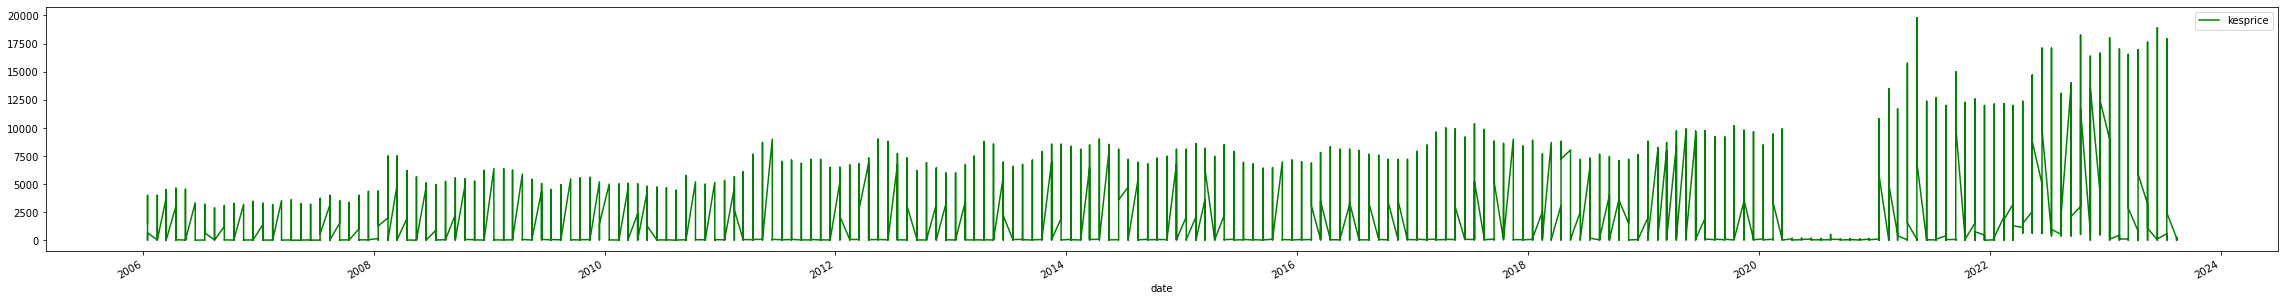

In [61]:
import matplotlib.pylab as plt
%matplotlib inline

df.plot(figsize=(40,5),color='green')

<AxesSubplot:xlabel='date'>

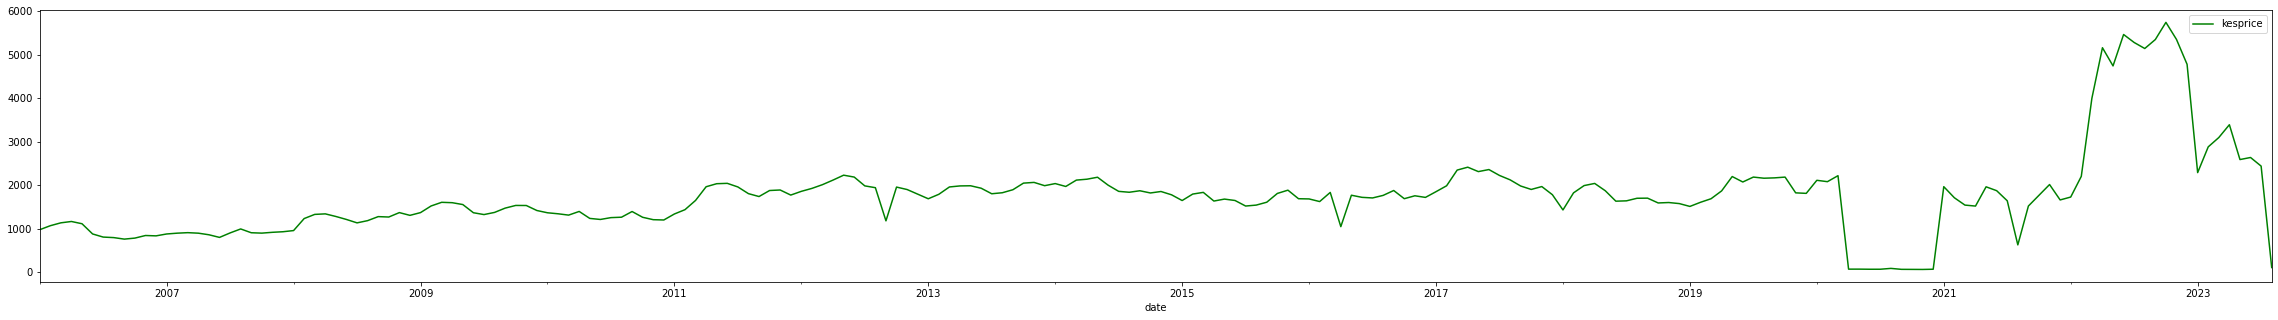

In [66]:
#Downsampling
monthly = df.resample('MS')
month_mean = monthly.mean()
month_mean.plot(figsize=(40,5),color='green')

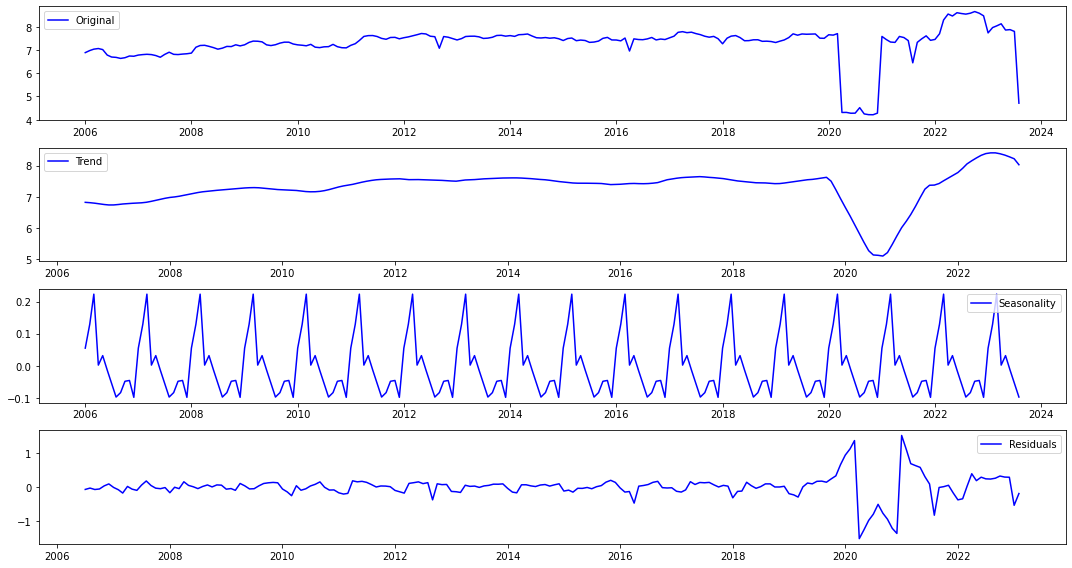

In [75]:
#decomposition
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(month_mean))
trend = decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(np.log(month_mean), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()